In [1]:
import pandas as pd
from mido import MidiFile
import numpy as np
from music21 import converter, instrument, note, chord
!pip install pypianoroll
import pypianoroll
!pip install pretty_midi
import pretty_midi
import os

<h1>Constants</h1>

In [2]:
NUMBER_OF_MEASURES = 24 # number of measures per sample
BEAT_RESOLUTION = 4 
MEASURE_RESOLUTION = 4 * BEAT_RESOLUTION
BATCH_SIZE = 72
DATAPATH="./beatles-dataset/"
SINGLETRACK = False
track_names = []
lead_track_names = ["melodie","melody","lead","vocal","vocals"]
guitar_track_names = ["guitar","lead guitar","electric guitar","gitar","guitar distorted"]
START_OFFSET = 0
track_names = lead_track_names #if MIDI are multitrack exp.

<h1>Procces MIDI files from datapath into np arrays</h1>

In [33]:
# Load data classical
song_paths = os.listdir(DATAPATH)
data_unprocessed = []
data_prev_unprocessed = []
for path in song_paths:
    try:
        multitrack = pypianoroll.read(DATAPATH + path)
    except:
        print("Could't read track " + path)
        continue
    try:
        multitrack.set_resolution(BEAT_RESOLUTION)
        multitrack.binarize()
        if SINGLETRACK:
            multitrack.tracks = [multitrack.tracks[0]]
        else:
            track_appended = False
            selected_track = []
            for track in multitrack.tracks:
                if len(list(filter(lambda x: x.lower() in track.name, track_names))) > 0 and not track_appended:
                        selected_track.append(track)
                        track_appended = True
                if len(selected_track) == 0:
                    continue
                multitrack.tracks = selected_track
        pianoroll = multitrack.stack()
        m = pianoroll[:,START_OFFSET:NUMBER_OF_MEASURES * MEASURE_RESOLUTION + START_OFFSET]
        bars = np.hsplit(m,NUMBER_OF_MEASURES)
        # shift bars for 1
        bars_prev = bars[-1:] + bars[:-1]
        bars_prev[0] = np.zeros(bars_prev[0].shape)
        for x in bars:
            data_unprocessed.append(x)
        for x_prev in bars_prev:
             data_prev_unprocessed.append(x_prev)
        print("File {0} processed".format(path))
    except Exception as e:
        print(e)
        print("Error processing file at path " + path)
        continue
print("Done")
print(len(data_unprocessed))
print(len(data_prev_unprocessed))

File Taxman.2.mid processed
File Slow Down.2.mid processed


/home/derek/anaconda3/lib/python3.8/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


File Birthday.2.mid processed
File Getting Better.mid processed
File I'm A Loser.mid processed
File What Goes On.mid processed
File Paperback Writer.2.mid processed
File Tell Me What You See.1.mid processed
File Here Comes the Sun   The Inner Light (transition).mid processed
File Medley: Rip It Up   Shake, Rattle and Roll   Blue Suede Shoes.1.mid processed
File Sgt. Pepper Inner Groove.mid processed
File Paperback Writer.3.mid processed
File Rock And Roll Music.2.mid processed
File Let It Be.9.mid processed
File A Hard Day's Night.3.mid processed
File Sgt. Pepper Inner Groove.3.mid processed
File There's a Place.mid processed
File Dream Baby.mid processed
File Hey Jude.4.mid processed
File Ob-La-Di, Ob-La-Da.mid processed
File Help!.3.mid processed
File Sun King.mid processed
File Get Back.6.mid processed
File I'll Cry Instead.mid processed
File Sgt. Pepper Inner Groove.2.mid processed
File Eleanor Rigby.11.mid processed
File All My Loving.mid processed
File Hippy Hippy Shake.mid proce

File Clarabella.mid processed
File Hey Jude.7.mid processed
File Roll Over Beethoven.1.mid processed
File And Your Bird Can Sing.1.mid processed
File Blackbird.mid processed
File Let It Be.7.mid processed
File Get Back.7.mid processed
File Hey Jude.1.mid processed
File All You Need Is Love.mid processed
File Helter Skelter.mid processed
File All My Loving.2.mid processed
File I Remember You.mid processed
File Why Don't We Do It in the Road.1.mid processed
File Please Please Me.1.mid processed
File Nowhere Man.2.mid processed
Could't read track Every Little Thing.mid
File A Hard Day's Night.1.mid processed
File Honey Don't.1.mid processed
File Getting Better.1.mid processed
File Things We Said Today.mid processed
File Penny Lane.5.mid processed
File Link Track   Save the Last Dance for Me.mid processed
File In My Life.4.mid processed
File The Inner Light.mid processed
File Blackbird.1.mid processed
File Maxwell's Silver Hammer.2.mid processed
File Eight Days A Week.3.mid processed
File 

File Come and Get It.1.mid processed
File Sweet Little Sixteen.mid processed
File Wait.1.mid processed
File Within You Without You.mid processed
File Something.3.mid processed
File The Girl I Love.mid processed
File Red Sails in the Sunset.mid processed
File Norwegian Wood.3.mid processed
File I'm So Tired.1.mid processed
File Can't Buy Me Love.2.mid processed
File Some Other Guy.mid processed
File Its Only Love.mid processed
File Stand by Me.mid processed
File Back In the U.S.S.R..mid processed
File Dear Prudence.mid processed
File And I Love Her.4.mid processed
File Because.mid processed
array split does not result in an equal division
Error processing file at path Love Me Do.7.mid
File While My Guitar Gently Weeps.1.mid processed
File Long Tall Sally.1.mid processed
File Words Of Love.mid processed
File Please Mister Postman.mid processed
array split does not result in an equal division
Error processing file at path Ob-La-Di, Ob-La-Da.1.mid
File Besame Mucho.mid processed
File Miser

File Come Together.2.mid processed
File Got To Get You Into My Life.3.mid processed
File The Inner Light.1.mid processed
File Help!.1.mid processed
File Chains.1.mid processed
File Ticket to Ride.2.mid processed
File Let It Be.2.mid processed
File Hey Jude.2.mid processed
File When I'm 64.4.mid processed
File All My Loving.4.mid processed
File Oh! Darling.5.mid processed
File Here Comes the Sun.3.mid processed
File Johnny B. Goode.mid processed
File Honey Don't.mid processed
File Everybody's Trying To Be My Baby.2.mid processed
File I Want to Hold Your Hand.5.mid processed
File I Forgot to Remember to Forget.mid processed
File Mr. Moonlight.mid processed
File Lovely Rita.2.mid processed
File Day Tripper.2.mid processed
File Slow Down.mid processed
File Ticket to Ride.4.mid processed
File Help!.2.mid processed
array split does not result in an equal division
Error processing file at path Moonlight Bay.mid
File Ballad of John and Yoko.mid processed
File Everybody's Trying To Be My Baby.1

<h1>Process collected data and plot sample</h1>

In [20]:
import matplotlib.pyplot as plt
data = data_unprocessed
data = [bar for bar in data if bar.shape == (1,16,128)]
data = np.stack(data)

plt.imshow(data[3].reshape(16,128))
plt.colorbar()
plt.show()

NameError: name 'data_unprocessed' is not defined

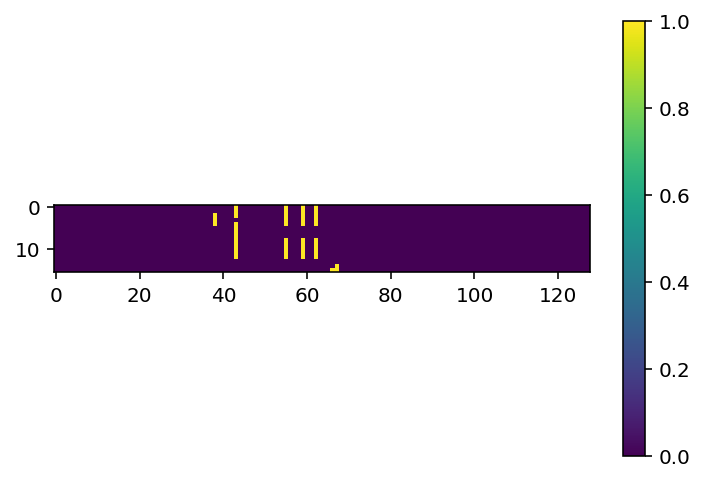

In [35]:
data_prev = data_prev_unprocessed
data_prev = [bar for bar in data_prev if bar.shape == (1,16,128)]

plt.imshow(data_prev[4].reshape(16,128))
plt.colorbar()
plt.show()

<h1>Save processed data to disk for later reuse</h1>

In [3]:
from numpy import asarray
from numpy import save

p = asarray(data_prev)
save('beatles_24bars_x_prev.npy', p)
p = asarray(data)
save('beatles_24bars_x.npy', p)

NameError: name 'data_prev' is not defined

<h1>Load processed data from disk</h1>

In [4]:
from numpy import load
import numpy as np
x_str = "./metal_24bars_x.npy"
x_str_prev = "./metal_24bars_x_prev.npy"
data_prev = load(x_str)
data = load(x_str_prev)
print("Length of x: {0}".format(len(data)))
print("Length of x prev: {0}".format(len(data_prev)))

Length of x: 960
Length of x prev: 960


<h1>Define PyThorch models</h1>

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets, models
from torch.utils.data import Dataset, DataLoader

has_gpu = torch.cuda.is_available()
print(has_gpu)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

True


<h1>Define PyThorch dataset for loading data</h1>

In [6]:
class BarDataset(Dataset):
    def __init__(self, data, data_prev, device):
        self.device = device
        self.data, self.data_prev, self.data_len = self.extract_data(data, data_prev)
    
    def __len__(self):
        return self.data_len
    
    @property
    def shape(self):
        return self.data.shape;
    
    def __getitem__(self, idx):
        X = self.data[idx]
        X_prev = self.data_prev[idx]
        return X, X_prev
    
    def extract_data(self, data, data_prev):
        data_len = data.shape[0]
        data = torch.Tensor(data).to(device)
        data_prev = torch.Tensor(data_prev).to(device)
        return data, data_prev, data_len

<h1>Define PyThorch dataloader</h1>

In [7]:
dataset = BarDataset(data,data_prev,device)
data_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

<h1>Define custom reusable Convolution and Transpoded Convolution layers</h1>

In [8]:
class ConvolutionLayer2d(nn.Module):
    def __init__(self, channels_in, channels_out, kernel, stride, padding):
        super(ConvolutionLayer2d, self).__init__()
        self.conv = nn.Conv2d(channels_in, channels_out, kernel, stride, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(channels_out)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.2, inplace = False)
    
    def forward(self,x):
        x = self.conv(x)
        x = self.batch_norm(x)
        x = self.leaky_relu(x)
        return x

In [9]:
class ConvolutionTransposeLayer2d(nn.Module):
    def __init__(self, channels_in, channels_out, kernel, stride, padding):
        super(ConvolutionTransposeLayer2d, self).__init__()
        self.conv = nn.ConvTranspose2d(channels_in, channels_out, kernel, stride, padding, bias=False)
        self.batch_norm = nn.BatchNorm2d(channels_out)
        self.relu = nn.ReLU(inplace = False)
    
    def forward(self, x, normalize=True, activation=None):
        x = self.conv(x)
        if normalize:
            x = self.batch_norm(x)
        if activation != None:
            x = activation(x)
        return x

<h1>Helper funciton to concat previous features on Transpoded Convolution output, on feature map axis</h1>

In [10]:
def conv_prev_concat(x, y):
        x_shapes = x.shape
        y_shapes = y.shape
        if x_shapes[2:] == y_shapes[2:]:
            y2 = y.expand(x_shapes[0],y_shapes[1],x_shapes[2],x_shapes[3])
            return torch.cat((x, y2),1)
        else:
            print("Error")
            print(x_shapes)
            print(y_shapes)

<h1>Custom Linear layer</h1>

In [11]:
class LinearLayer(nn.Module):
    def __init__(self, linear_in, linear_out):
        super(LinearLayer, self).__init__()
        self.linear = nn.Linear(linear_in, linear_out)
        self.batch_norm = nn.BatchNorm1d(linear_out)
        self.relu =  nn.ReLU()
    
    def forward(self, x):
        x = self.linear(x)
        x = self.batch_norm(x)
        x = self.relu(x)
        return x

<h1>Define Generator</h1>

In [12]:
class Generator(nn.Module):
    def __init__(self, nz=100, pitches=128):
        super(Generator,self).__init__()
        self.nz = nz
        self.pitches = pitches
        self.filters_number = 128
        self.filters_number_conditioner = 32
        self.transpose_filters_number = 160
        
        self.linear0 = LinearLayer(nz, 1024)
        self.linear1 = LinearLayer(1024,256)
        
        # Generator transposed convolutions layers
        self.hidden0 = ConvolutionTransposeLayer2d(channels_in=self.transpose_filters_number, channels_out=self.filters_number, kernel=(2,1), stride=2, padding=0)
        self.hidden1 = ConvolutionTransposeLayer2d(channels_in=self.transpose_filters_number, channels_out=self.filters_number, kernel=(2,1), stride=2, padding=0)
        self.hidden2 = ConvolutionTransposeLayer2d(channels_in=self.transpose_filters_number, channels_out=self.filters_number, kernel=(2,1), stride=2, padding=0)
        self.hidden3 = ConvolutionTransposeLayer2d(channels_in=self.transpose_filters_number, channels_out=1, kernel=(1,pitches), stride=(1,2), padding=0)
        
        # Conditioner convolution layers
        self.condition_hidden0 = ConvolutionLayer2d(channels_in=1, channels_out=self.filters_number_conditioner, kernel=(1,128), stride=(1,2), padding=0)
        self.condition_hidden1 = ConvolutionLayer2d(channels_in=self.filters_number_conditioner, channels_out=self.filters_number_conditioner, kernel=(2,1), stride=2, padding=0)
        self.condition_hidden2 = ConvolutionLayer2d(channels_in=self.filters_number_conditioner, channels_out=self.filters_number_conditioner, kernel=(2,1), stride=2, padding=0)
        self.condition_hidden3 = ConvolutionLayer2d(channels_in=self.filters_number_conditioner, channels_out=self.filters_number_conditioner, kernel=(2,1), stride=2, padding=0)
        
        self.sigmoid = nn.Sigmoid()
            
    def forward(self, z, prev_x):
        batch_size = prev_x.shape[0]
        
        condition_hidden0 = self.condition_hidden0(prev_x) 
        condition_hidden1 = self.condition_hidden1(condition_hidden0)   
        condition_hidden2 = self.condition_hidden2(condition_hidden1)
        condition_hidden3 = self.condition_hidden2(condition_hidden2)
        
        z = z.view(batch_size,-1)
        
        h0 = self.linear0(z)
        h1 = self.linear1(h0)
        
        h1 = h1.view(batch_size, 128, 2, 1)
        h1 = conv_prev_concat(h1, condition_hidden3)

        h2 = self.hidden0(h1)
        h2 = conv_prev_concat(h2, condition_hidden2)
        
        h3 = self.hidden1(h2)
        h3 = conv_prev_concat(h3, condition_hidden1)
        
        h4 = self.hidden2(h3)
        h4 = conv_prev_concat(h4, condition_hidden0)
        
        x = self.hidden3(h4, normalize=False, activation=nn.Sigmoid())
                
        return x
        
        
        


<h1>Define Discriminator</h1>

In [16]:
class Discriminator(nn.Module):
    def __init__(self, pitches=128):
        super(Discriminator,self).__init__()
        self.pitches = pitches
        self.linear_in = 231#77
        
        self.hidden0 = ConvolutionLayer2d(channels_in=1, channels_out=24, kernel=(2,128), stride=2, padding=0)
        self.hidden1 = ConvolutionLayer2d(channels_in=24, channels_out=77, kernel=(3,1), stride=2, padding=0)
        self.linear = nn.Linear(self.linear_in, 1024)
        self.linear2 = nn.Linear(1024,1)
        self.sigmoid = nn.Sigmoid()
        self.lrelu = nn.LeakyReLU()
        
    def forward(self, x):
        batch_size = x.shape[0]
        h0 = self.hidden0(x)
        fm = h0
        h1 = self.hidden1(h0)
        h1 = h1.view(batch_size,-1)
        l = self.linear(h1)
        l = self.lrelu(l)
        out = self.linear2(l)
        out_sigmoid = self.sigmoid(out)
        return out_sigmoid, out, fm                                  

<h1>Helper methods</h1>

In [17]:
def reduce_mean(x):
    output = torch.mean(x,0, keepdim = False)
    output = torch.mean(output,-1, keepdim = False)
    return output

def l2_loss(x,y):
    return nn.MSELoss(reduction='sum')(x, y) / 2


<h1>Train GAN</h1>

In [18]:
lr = 0.0002
epochs=200
nz=100
betas = (0.5, 0.999)

torch.cuda.empty_cache()

netG = Generator(nz=nz)
netD = Discriminator()

optimizerG = torch.optim.Adam(netG.parameters(), lr=lr, betas=betas)
optimizerD = torch.optim.Adam(netD.parameters(), lr=lr, betas=betas)

criterion = nn.BCEWithLogitsLoss()

n_g_train = 2

netG.train()
netD.train()

netG.to(device)
netD.to(device)
    
G_losses = []
D_losses = []

lamda1 = 0.01
lamda2 = 0.1


for epoch in range(epochs):
    for i, (X, X_prev) in enumerate(data_loader, 0):        
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        batch_size = X.size(0)
        output_real, logits_real, fm = netD(X)
        fm_r = fm.clone()
        real_label = torch.ones_like(logits_real) * 0.9 
        errD_real = reduce_mean(criterion(logits_real,real_label))
        D_x = output_real.mean().item()
        
        ## Train with all-fake batch
        noise = torch.rand(batch_size, nz, device=device)
        fake = netG(noise,X_prev)
        output_fake, logits_fake, fm_ = netD(fake.detach())
        fake_label = torch.zeros_like(logits_fake)
        errD_fake = reduce_mean(criterion(logits_fake,fake_label))
        D_G_z1 = output_fake.mean().item()
        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        errD.backward(retain_graph=True)
        # Update D
        optimizerD.step()
       
        ############################
        # (2) Update G network: 
        # maximize log(D(G(z))) + lamda1 * l2_loss(fake_image,real_image) + lamda2 * l2_loss(fm_fake,fm_real)
        # Update G n_g_train times to make Discriminator weaker
        ###########################
        for _ in range(0,n_g_train):
            noise = torch.rand(batch_size, nz, device=device)
            fake = netG(noise, X_prev)
            optimizerG.zero_grad()
            output, logits, fm_ = netD(fake)
            D_G_z2 = output.mean().item()
            real_label = torch.ones_like(logits)
            g_loss_fake = reduce_mean(criterion(logits, real_label))
            # Feature matching 
            mean_fake_image = torch.mean(fake,0)
            mean_real_image = torch.mean(X, 0)
            g_loss_image = l2_loss(mean_fake_image, mean_real_image)
            g_loss_image = torch.mul(g_loss_image, lamda1)
            # Feature matching based on first convolution output
            mean_fm_real = torch.mean(fm,0)
            mean_fm_fake = torch.mean(fm_,0)
            g_loss_fm = l2_loss(mean_fm_fake, mean_fm_real)
            g_loss_fm = torch.mul(g_loss_fm, lamda2)
            # Compute error of G as sum of criterion loss and feature matching loss
            errG = g_loss_fake + g_loss_image + g_loss_fm  
            errG.backward(retain_graph=True,inputs=list(netG.parameters()))
            # Update G
            optimizerG.step()

        
        if i % 15 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, epochs, i, len(data_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        

[0/200][0/14]	Loss_D: 1.3803	Loss_G: 3.5528	D(x): 0.4709	D(G(z)): 0.4694 / 0.4517
[1/200][0/14]	Loss_D: 1.3356	Loss_G: 3.4166	D(x): 0.4644	D(G(z)): 0.4378 / 0.4358
[2/200][0/14]	Loss_D: 1.3117	Loss_G: 3.3611	D(x): 0.4739	D(G(z)): 0.4338 / 0.4223
[3/200][0/14]	Loss_D: 1.2741	Loss_G: 3.2670	D(x): 0.4887	D(G(z)): 0.4266 / 0.4150
[4/200][0/14]	Loss_D: 1.2830	Loss_G: 3.1423	D(x): 0.5004	D(G(z)): 0.4411 / 0.4239
[5/200][0/14]	Loss_D: 1.2483	Loss_G: 3.0503	D(x): 0.5045	D(G(z)): 0.4253 / 0.4155
[6/200][0/14]	Loss_D: 1.2198	Loss_G: 2.9368	D(x): 0.5184	D(G(z)): 0.4220 / 0.4133
[7/200][0/14]	Loss_D: 1.1986	Loss_G: 2.8030	D(x): 0.5328	D(G(z)): 0.4224 / 0.4157
[8/200][0/14]	Loss_D: 1.1918	Loss_G: 2.7047	D(x): 0.5312	D(G(z)): 0.4159 / 0.4038
[9/200][0/14]	Loss_D: 1.1933	Loss_G: 2.5688	D(x): 0.5369	D(G(z)): 0.4214 / 0.4039
[10/200][0/14]	Loss_D: 1.1901	Loss_G: 2.4227	D(x): 0.5483	D(G(z)): 0.4280 / 0.4105
[11/200][0/14]	Loss_D: 1.1440	Loss_G: 2.3039	D(x): 0.5623	D(G(z)): 0.4129 / 0.4031
[12/200][0/14]

[99/200][0/14]	Loss_D: 0.6594	Loss_G: 2.2969	D(x): 0.7501	D(G(z)): 0.2094 / 0.1519
[100/200][0/14]	Loss_D: 0.5749	Loss_G: 2.4864	D(x): 0.7497	D(G(z)): 0.1509 / 0.1386
[101/200][0/14]	Loss_D: 0.7455	Loss_G: 1.9114	D(x): 0.6921	D(G(z)): 0.2060 / 0.2352
[102/200][0/14]	Loss_D: 0.6031	Loss_G: 1.9971	D(x): 0.8090	D(G(z)): 0.2089 / 0.2280
[103/200][0/14]	Loss_D: 0.7218	Loss_G: 1.4647	D(x): 0.6722	D(G(z)): 0.2136 / 0.2984
[104/200][0/14]	Loss_D: 0.7171	Loss_G: 2.0513	D(x): 0.7833	D(G(z)): 0.2603 / 0.1715
[105/200][0/14]	Loss_D: 0.7137	Loss_G: 1.4583	D(x): 0.6132	D(G(z)): 0.1489 / 0.3433
[106/200][0/14]	Loss_D: 0.7721	Loss_G: 2.1981	D(x): 0.7674	D(G(z)): 0.2802 / 0.1693
[107/200][0/14]	Loss_D: 0.6899	Loss_G: 1.5172	D(x): 0.6932	D(G(z)): 0.1988 / 0.2887
[108/200][0/14]	Loss_D: 0.8739	Loss_G: 1.5279	D(x): 0.6391	D(G(z)): 0.2595 / 0.3222
[109/200][0/14]	Loss_D: 0.7403	Loss_G: 1.9405	D(x): 0.8126	D(G(z)): 0.3041 / 0.1907
[110/200][0/14]	Loss_D: 0.8284	Loss_G: 1.8078	D(x): 0.7515	D(G(z)): 0.3271 / 

[197/200][0/14]	Loss_D: 1.1686	Loss_G: 1.0481	D(x): 0.5080	D(G(z)): 0.3332 / 0.4230
[198/200][0/14]	Loss_D: 1.2575	Loss_G: 1.2105	D(x): 0.7122	D(G(z)): 0.5187 / 0.3259
[199/200][0/14]	Loss_D: 1.2070	Loss_G: 1.0500	D(x): 0.5299	D(G(z)): 0.3615 / 0.3775


<h1>Print loss graph</h1>

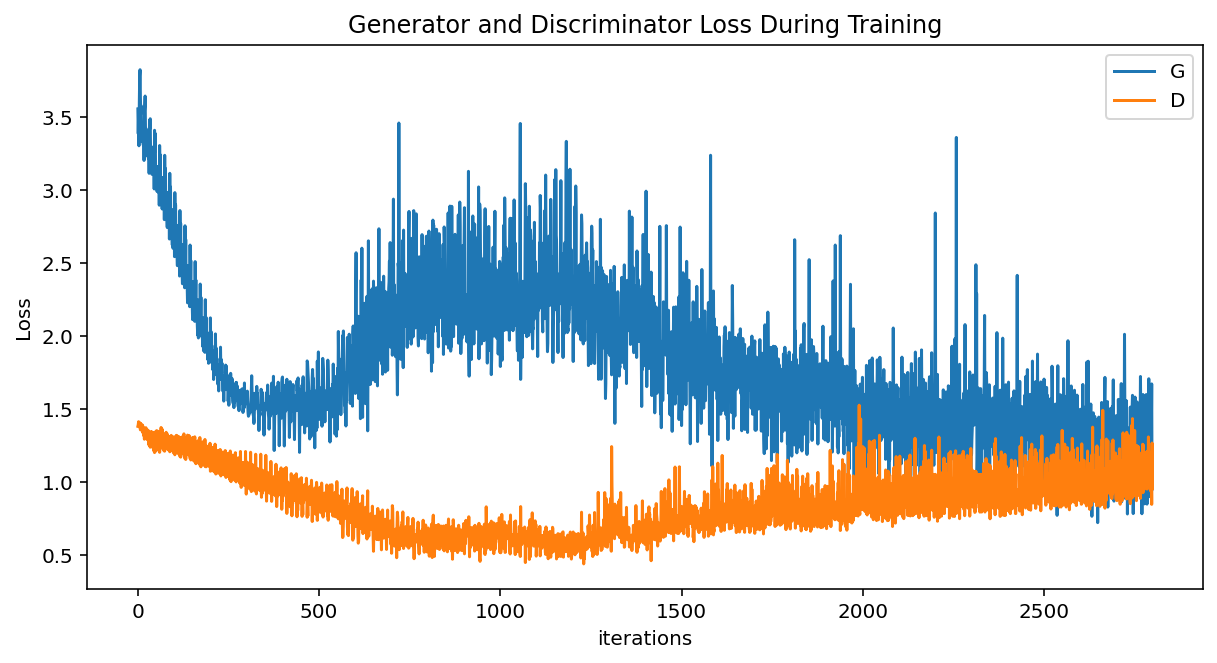

In [21]:
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

<h1>Save trained models to disk</h1>

In [36]:
torch.save(netD.state_dict(), "./checkpoint/discriminator_classical.pth")
torch.save(netG.state_dict(), "./checkpoint/generator_classical.pth")

<h1>Generate sample</h1>

In [24]:
iterator = iter(data_loader)
next(iterator)
next(iterator)
real_batch = next(iterator)
print(real_batch[0].shape)
outputs = []
for i in range(0,20):
    noise = torch.randn(2,nz).to(device)
    if i == 0:
        prev = real_batch[1]
        outputs.append(netG(noise,prev[0:2]))
    else:
        outputs.append(netG(noise,outputs[i - 1]))

torch.Size([72, 1, 16, 128])


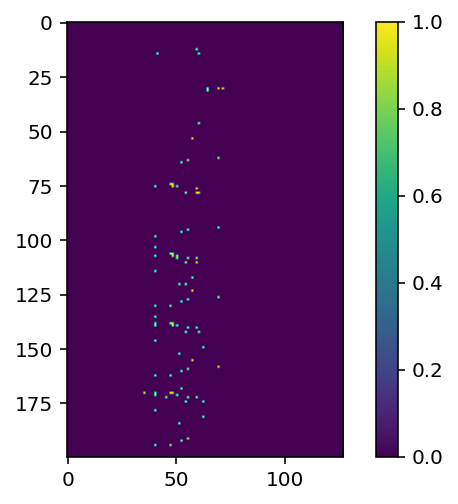

In [25]:
outputs = np.array(outputs)
melody = [outputs[i].detach().cpu().numpy() for i in range(0,20)]
melody = np.stack(melody)
melody = np.concatenate(melody, axis=0)
melodies = []
m = melody[0]
for i in range(1,melody.shape[0]):
    m = np.concatenate((m,melody[i]),axis=1)
m = m[0,:,0:127]
m[m > 0.6] = 1
m = m == 1
plt.imshow(m[0:200])
plt.colorbar()
plt.show()
melody_track = pypianoroll.BinaryTrack(pianoroll = m)
multi_track = pypianoroll.Multitrack(tracks=[melody_track],tempo=np.array([[120.0]]),resolution=24)
pypianoroll.write('./sample.mid', multi_track)